In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import fetch_lfw_people

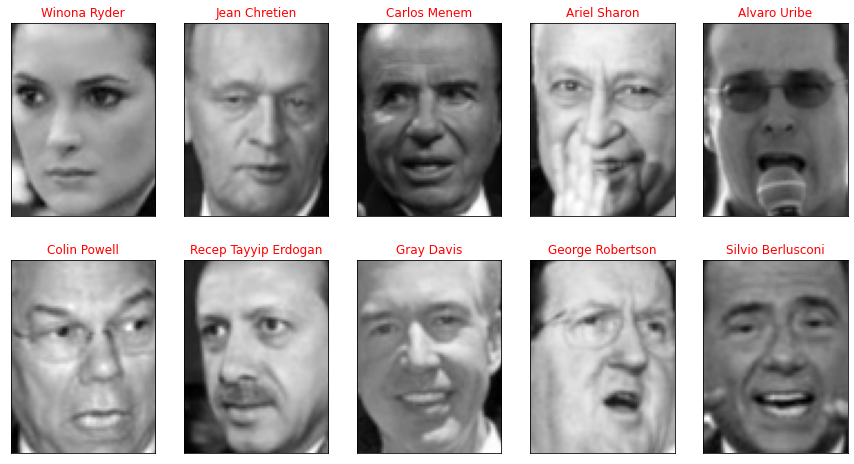

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target], color='red')

In [3]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [4]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [5]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255

In [6]:
X_train, X_test, y_train, y_test = tts(
    X_people, y_people, stratify=y_people, random_state=0)

In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0, ddof=1)
X_s_train = (X_train - mean)/std
X_s_test = (X_test - mean)/std
values, vectors = np.linalg.eig((X_s_train.T @ X_s_train)/(X_s_train.shape[0] - 1))

In [8]:
two = values.argsort()[::-1][:2]
twoValues = values[two]
twoVectors = vectors[:,two]
projected_train = X_s_train @ twoVectors
projected_test = X_s_test @ twoVectors

In PC1, the eyes are wider and the lips/mouth are wider


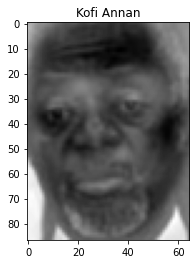

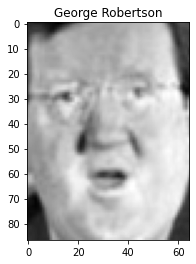

In PC2, the eyes are squinty and the lips/mouth pertrub outwards


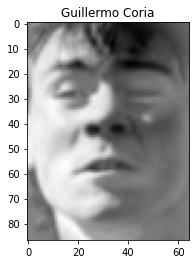

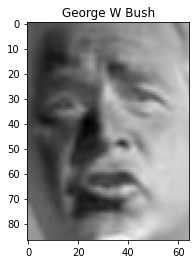

In [9]:
# clearly for the first column, it is using the surprised facial expression
print("In PC1, the eyes are wider and the lips/mouth are wider")
plt.imshow(X_s_train[projected_train[:,0].argmax(),:].reshape(87, 65), cmap=cm.gray)
plt.title(people.target_names[y_train[projected_train[:,0].argmax()]])
plt.show()
plt.imshow(X_s_train[projected_train[:,0].argmin(),:].reshape(87, 65), cmap=cm.gray)
plt.title(people.target_names[y_train[projected_train[:,0].argmin()]])
plt.show()
# for the second column, it is using the grunt facial expression
print("In PC2, the eyes are squinty and the lips/mouth pertrub outwards")
plt.imshow(X_s_train[projected_train[:,1].argmax(),:].reshape(87, 65), cmap=cm.gray)
plt.title(people.target_names[y_train[projected_train[:,1].argmax()]])
plt.show()
plt.imshow(X_s_train[projected_train[:,1].argmin(),:].reshape(87, 65), cmap=cm.gray)
plt.title(people.target_names[y_train[projected_train[:,1].argmin()]])
plt.show()

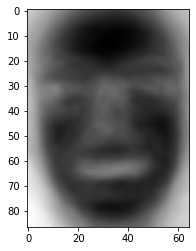

In [10]:
plt.imshow(twoVectors[:,0].reshape(87, 65), cmap=cm.gray)
plt.show()

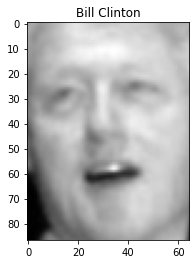

In [11]:
plt.imshow(X_train[0].reshape(87, 65), cmap=cm.gray)
plt.title('Bill Clinton')
plt.show()

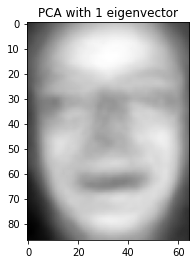

In [12]:
one = values.argsort()[::-1][:1]
pVec = vectors[:,one]
recon = X_train[0] @ pVec @ pVec.T
plt.imshow(recon.reshape(87, 65), cmap=cm.gray)
plt.title('PCA with 1 eigenvector')
plt.show()

In [13]:
k = 1
while (sum(values[:k])/sum(values) <= .95):
    k += 1
print(f"Num of eigenvectors needed: {k}")

Num of eigenvectors needed: 189


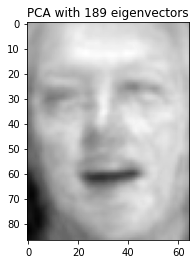

In [14]:
vecs95 = vectors[:,values.argsort()[::-1][:k]]
recon95 = X_train[0] @ vecs95 @ vecs95.T
plt.imshow(recon95.reshape(87, 65), cmap=cm.gray)
plt.title('PCA with 189 eigenvectors')
plt.show()